# Problem Statement

# Importing All necessary Libraries

In [296]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Importing Warnings

In [297]:
import warnings
warnings.filterwarnings('ignore')

# Loading the Dataset

In [298]:
import pandas as pd
file = 'test_agriculture.csv'        
df = pd.read_csv(file)
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,F00000002,188,1,1,1,0,NaN,0,2
1,F00000007,410,1,1,1,0,0.0,0,2
2,F00000011,626,1,0,1,0,0.0,0,2
3,F00000013,731,1,0,1,0,0.0,0,2
4,F00000014,789,0,0,1,0,0.0,0,1


In [299]:
df.shape

(1199, 9)

In [300]:
import pandas as pd
file1 = 'train_agriculture.csv'        
df1 = pd.read_csv(file1)
df1.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000001,188,1,0,1,0,0.0,0,1,0
1,F00000003,209,1,0,1,0,0.0,0,2,1
2,F00000004,257,1,0,1,0,0.0,0,2,1
3,F00000005,257,1,1,1,0,0.0,0,2,1
4,F00000006,342,1,0,1,0,0.0,0,2,1


In [301]:
df1.shape

(4599, 10)

In [302]:
df = pd.concat([df, df1])
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,NaN,0,2,NaN
1,F00000007,410,1,1,1,0,0.0,0,2,NaN
2,F00000011,626,1,0,1,0,0.0,0,2,NaN
3,F00000013,731,1,0,1,0,0.0,0,2,NaN
4,F00000014,789,0,0,1,0,0.0,0,1,NaN


# Shape

In [303]:
df=pd.DataFrame(df)
df.shape

(5798, 10)

# Columns

In [304]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

# Information

In [305]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5798 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       5798 non-null   object 
 1   Estimated_Insects_Count  5798 non-null   int64  
 2   Crop_Type                5798 non-null   int64  
 3   Soil_Type                5798 non-null   int64  
 4   Pesticide_Use_Category   5798 non-null   int64  
 5   Number_Doses_Week        5798 non-null   int64  
 6   Number_Weeks_Used        5237 non-null   float64
 7   Number_Weeks_Quit        5798 non-null   int64  
 8   Season                   5798 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 498.3+ KB


### Discover different types of columns using groupby

In [306]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Estimated_Insects_Count', 'Crop_Type', 'Soil_Type', 'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Quit', 'Season'], float64: ['Number_Weeks_Used', 'Crop_Damage'], object: ['ID']}

# Missing Values

In [307]:
df.isnull().values.any()

True

Observations : 
    
    Missing values are present here

### Missing values column wise

In [308]:
df.isnull().sum()

ID                            0
Estimated_Insects_Count       0
Crop_Type                     0
Soil_Type                     0
Pesticide_Use_Category        0
Number_Doses_Week             0
Number_Weeks_Used           561
Number_Weeks_Quit             0
Season                        0
Crop_Damage                1199
dtype: int64

### Missing values via visualization

<AxesSubplot:>

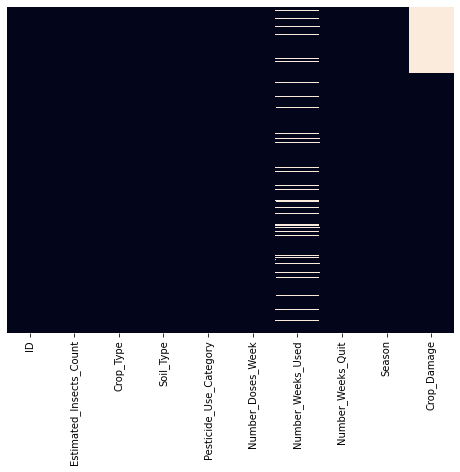

In [309]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

Observations: 
    
    Missing values are present in Number_Weeks_Used and Crop_Damaged columns.

### Unique values

In [310]:
df.nunique()

ID                         5798
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

### See unique values

In [311]:
for col in df:
    print(df[col].value_counts()) 

F00004182    1
F00003241    1
F00004520    1
F00004307    1
F00000926    1
            ..
F00003768    1
F00004717    1
F00001132    1
F00000038    1
F00000660    1
Name: ID, Length: 5798, dtype: int64
1132    251
1385    229
1056    228
1212    227
1478    208
       ... 
3896     10
3515      9
231       7
4097      6
169       4
Name: Estimated_Insects_Count, Length: 71, dtype: int64
0    4531
1    1267
Name: Crop_Type, dtype: int64
0    3060
1    2738
Name: Soil_Type, dtype: int64
2    3900
3    1831
1      67
Name: Pesticide_Use_Category, dtype: int64
20    1504
40     823
30     746
10     693
15     492
5      338
25     311
60     299
50     222
35     129
45      67
0       67
80      46
70      23
55      18
90       7
65       6
85       4
75       2
95       1
Name: Number_Doses_Week, dtype: int64
20.0    258
30.0    242
25.0    210
35.0    172
40.0    165
       ... 
62.0      6
63.0      5
65.0      3
66.0      3
64.0      2
Name: Number_Weeks_Used, Length: 63, dtype: int

### Impute Missing values

### Number_Weeks_Used column

In [312]:
df['Number_Weeks_Used'].mode()[0]

20.0

In [313]:
df['Number_Weeks_Used']=df['Number_Weeks_Used'].fillna(df['Number_Weeks_Used'].mode()[0])

In [314]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,20.0,0,2,NaN
1,F00000007,410,1,1,1,0,0.0,0,2,NaN
2,F00000011,626,1,0,1,0,0.0,0,2,NaN
3,F00000013,731,1,0,1,0,0.0,0,2,NaN
4,F00000014,789,0,0,1,0,0.0,0,1,NaN


Crop_Damage has better correlation with Number_Weeks_Used column. So, fill Crop_Damage column according to the mode of Number_Weeks_Used column.

### Crop_Damage column

In [315]:
df.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.024004,-0.190848,-0.015056,-0.122206,0.431917,0.228822,-0.002287,0.202312
Crop_Type,-0.024004,1.000000,-0.127340,0.373412,-0.164966,0.010887,-0.290973,0.003754,0.021772
Soil_Type,-0.190848,-0.127340,1.000000,0.044193,0.051543,-0.099297,-0.062686,-0.005204,-0.059481
Pesticide_Use_Category,-0.015056,0.373412,0.044193,1.000000,-0.006929,0.365346,-0.574041,0.009279,0.199195
Number_Doses_Week,-0.122206,-0.164966,0.051543,-0.006929,1.000000,0.102647,-0.024209,0.002751,-0.018363
Number_Weeks_Used,0.431917,0.010887,-0.099297,0.365346,0.102647,1.000000,-0.412724,-0.007032,0.222360
Number_Weeks_Quit,0.228822,-0.290973,-0.062686,-0.574041,-0.024209,-0.412724,1.000000,0.010324,-0.152918
Season,-0.002287,0.003754,-0.005204,0.009279,0.002751,-0.007032,0.010324,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.222360,-0.152918,-0.016196,1.000000


In [316]:
df = df[~df.index.duplicated()]
df['Crop_Damage'] = df.groupby(['Number_Weeks_Used'], sort=False)['Crop_Damage'].apply(lambda x: x.fillna(x.mode()))

In [317]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,F00000002,188,1,1,1,0,20.0,0,2,0.0
1,F00000007,410,1,1,1,0,0.0,0,2,NaN
2,F00000011,626,1,0,1,0,0.0,0,2,NaN
3,F00000013,731,1,0,1,0,0.0,0,2,NaN
4,F00000014,789,0,0,1,0,0.0,0,1,NaN


df.isnull().sum()

In [318]:
df['Crop_Damage']=df['Crop_Damage'].fillna(df['Crop_Damage'].mode()[0])

In [319]:
df.isnull().sum()

ID                         0
Estimated_Insects_Count    0
Crop_Type                  0
Soil_Type                  0
Pesticide_Use_Category     0
Number_Doses_Week          0
Number_Weeks_Used          0
Number_Weeks_Quit          0
Season                     0
Crop_Damage                0
dtype: int64

Now, There are no null values present in the dataset

In [320]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   object 
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int64(7), object(1)
memory usage: 555.2+ KB


### Change 'ID' column from object to numeric by using LabelEncoding

In [321]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
df['ID'] = labelencoder.fit_transform(df['ID'])
df['ID'].head()

0    0
1    1
2    2
3    3
4    4
Name: ID, dtype: int32

In [322]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,188,1,1,1,0,20.0,0,2,0.0
1,1,410,1,1,1,0,0.0,0,2,0.0
2,2,626,1,0,1,0,0.0,0,2,0.0
3,3,731,1,0,1,0,0.0,0,2,0.0
4,4,789,0,0,1,0,0.0,0,1,0.0


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4599 entries, 0 to 4598
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       4599 non-null   int32  
 1   Estimated_Insects_Count  4599 non-null   int64  
 2   Crop_Type                4599 non-null   int64  
 3   Soil_Type                4599 non-null   int64  
 4   Pesticide_Use_Category   4599 non-null   int64  
 5   Number_Doses_Week        4599 non-null   int64  
 6   Number_Weeks_Used        4599 non-null   float64
 7   Number_Weeks_Quit        4599 non-null   int64  
 8   Season                   4599 non-null   int64  
 9   Crop_Damage              4599 non-null   float64
dtypes: float64(2), int32(1), int64(7)
memory usage: 537.3 KB


Now, all the columns has been changed to numeric

# Summary Statistics

In [324]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [325]:
df.describe()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,2299.000000,1365.499674,0.202000,0.520113,2.240270,26.652533,27.419874,9.726680,1.883018,0.123723
std,1327.761274,837.569656,0.401536,0.499650,0.448646,15.678373,12.020374,9.730977,0.690623,0.372675
min,0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1149.500000,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,2299.000000,1132.000000,0.000000,1.000000,2.000000,20.000000,25.000000,8.000000,2.000000,0.000000
75%,3448.500000,1898.000000,0.000000,1.000000,2.000000,40.000000,35.000000,16.000000,2.000000,0.000000
max,4598.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


Observations:

1.Maximum ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage are : 4598.000000,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000

2.Minimum ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage are 0.000000,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000

Estimated_Insects_Count,Crop_Type,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit, mean is greater than median therefore data is right skewed for these attributes. (i,z) columns have very less difference with median.

In the Season column median is greater than mean therefre data is left skewed for these attributes.(u,g,r) have very less difference with median.

The difference between 75% and maximum is higher in Estimated_Insects_Count,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit columns therefore outliers are present in these columns.

# Correlation

Correlation only with target variable

Text(0.5, 1.0, 'Correlation with Target Variable')

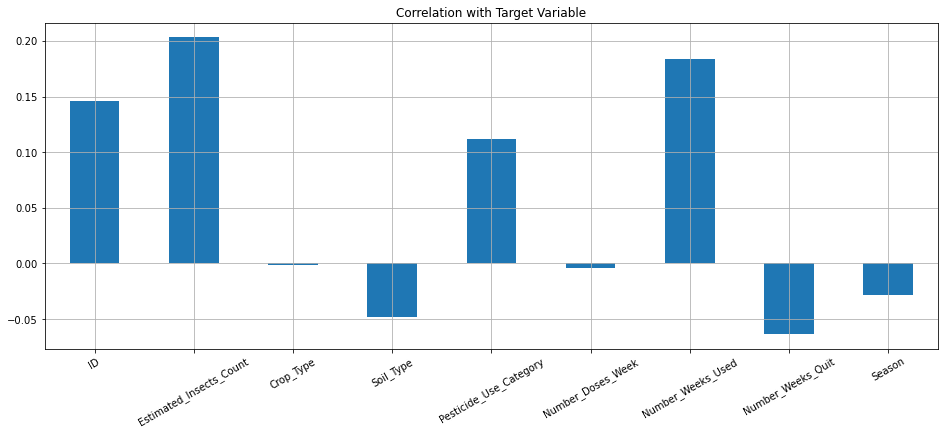

In [326]:
plt.figure(figsize=(16,6))
df.drop('Crop_Damage',axis=1).corrwith(df['Crop_Damage']).plot(kind='bar',grid=True)
plt.xticks(rotation=30)
plt.title("Correlation with Target Variable")

Observations: 
    
    1. Negative correlation : Crop_Type, Soil_Type, Number_Doses_Week, Number_Weeks_Quit,Season
        
    2. Rest of the columns have positive correlation
        
        

In [327]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [328]:
df[df.columns[0:]].corr()['Crop_Damage'][:]

ID                         0.145739
Estimated_Insects_Count    0.203085
Crop_Type                 -0.001364
Soil_Type                 -0.047822
Pesticide_Use_Category     0.112238
Number_Doses_Week         -0.004105
Number_Weeks_Used          0.183278
Number_Weeks_Quit         -0.063479
Season                    -0.028255
Crop_Damage                1.000000
Name: Crop_Damage, dtype: float64

Findings:

Status of correlation with target variable Crop_Damage : 

1. Negative correlation : Crop_Type, Soil_Type, Number_Doses_Week, Number_Weeks_Quit,Season 

2. Positive correlation : 'ID', 'Estimated_Insects_Count','Pesticide_Use_Category', 'Number_Weeks_Used','Season'

4. Strong Correlationship : Number_Weeks_Used,Pesticide_Use_Category,  Estimated_Insects_Count,ID

5. Weak Correlation : Lat,ISO3

# Heatmap

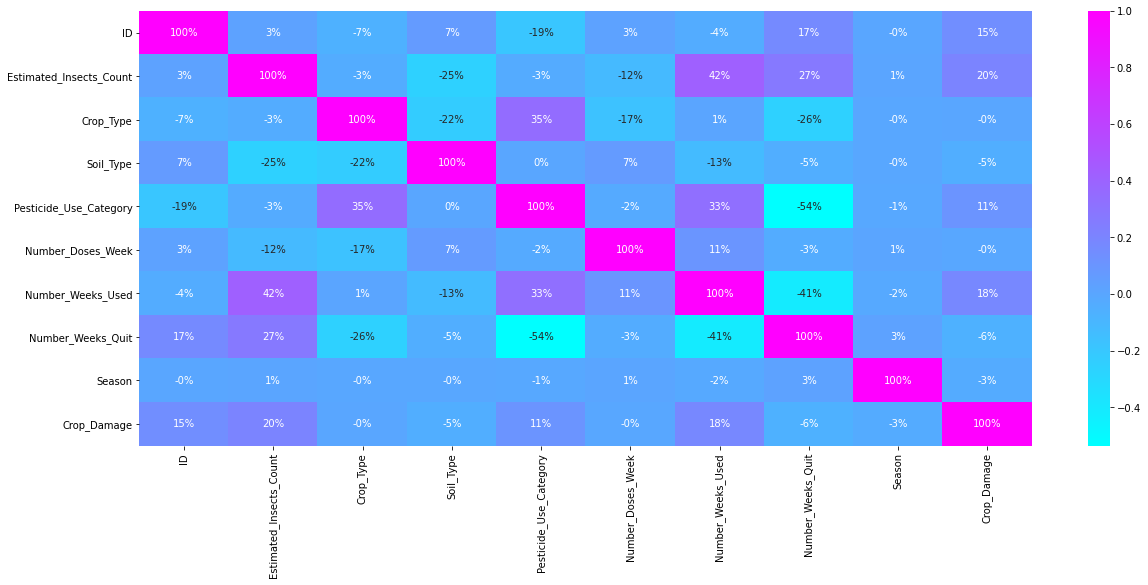

In [329]:
plt.figure(figsize=(20,8))
sns.heatmap(df.corr(),annot=True,fmt='.0%',cmap='cool')
plt.show()

Observations : 
    
    1. Except The target variable in the other columns there are good correlations as well : 
        
        1. Number_Weeks_Quit and Estimated_Insects_Count has 27% correlation. Number_Weeks_Quit and Pesticide_Use_Category has also strong correlation. But theyare negatively correlated.
        
        2. Number_Weeks_Used and Pesticide_Use_Category = 33% . Number_Weeks_Used and Number_Weeks_Quit =-41%.
        
        3. Pesticide_Use_Category and crop_type = 35%.
        
        4. Number_Weeks_Used and Estimated_Insects_Count=42%.
        
        4. Correlation with target variable has been described in the previous step.
    
    
    
    

# Data Visualizations

# Univariate Analysis

In [376]:
df.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

# ID

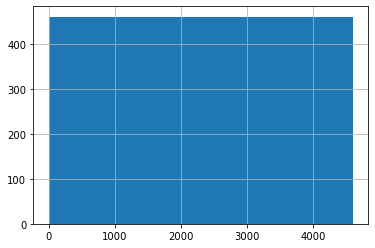

In [379]:
df["ID"].hist()
plt.show()

# Estimated_Insects_Count 

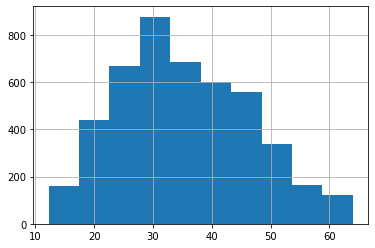

In [380]:
df["Estimated_Insects_Count"].hist()
plt.show()

# Crop_Type

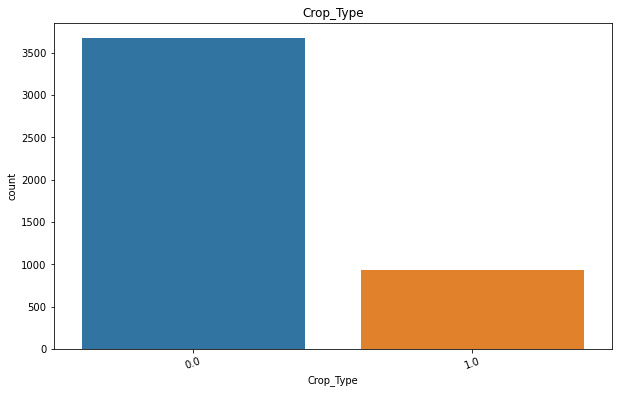

0.0    3670
1.0     929
Name: Crop_Type, dtype: int64


In [388]:
plt.subplots(figsize=(10,6))
sns.countplot(x="Crop_Type",data=df)
plt.title("Crop_Type")
plt.xticks(rotation=20)
plt.show()

print(df.Crop_Type.value_counts())

# Soil_Type

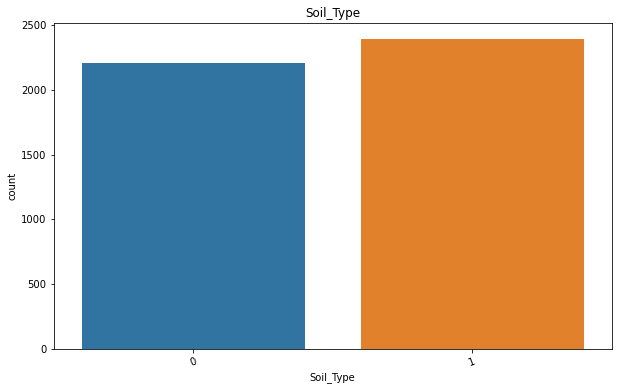

1    2392
0    2207
Name: Soil_Type, dtype: int64


In [387]:
plt.subplots(figsize=(10,6))
sns.countplot(x="Soil_Type",data=df)
plt.title("Soil_Type")
plt.xticks(rotation=20)
plt.show()

print(df.Soil_Type.value_counts())

# Pesticide_Use_Category

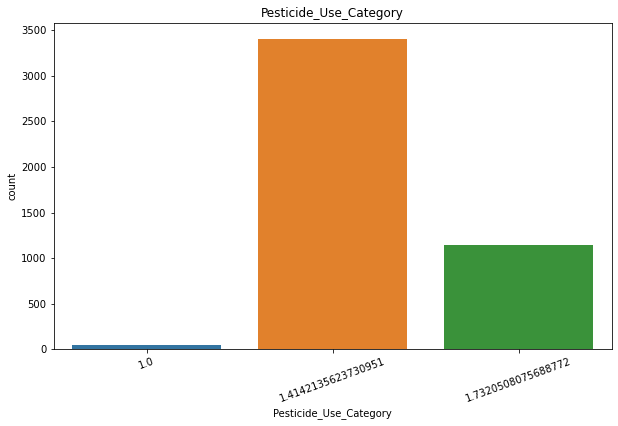

1.414214    3408
1.732051    1148
1.000000      43
Name: Pesticide_Use_Category, dtype: int64


In [386]:
plt.subplots(figsize=(10,6))
sns.countplot(x="Pesticide_Use_Category",data=df)
plt.title("Pesticide_Use_Category")
plt.xticks(rotation=20)
plt.show()

print(df.Pesticide_Use_Category.value_counts())

# Number_Doses_Week

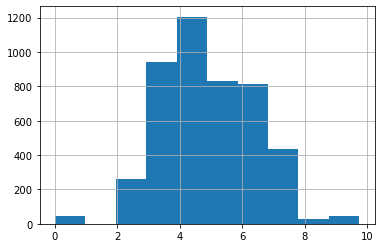

In [381]:
df["Number_Doses_Week"].hist()
plt.show()

# Number_Weeks_Used

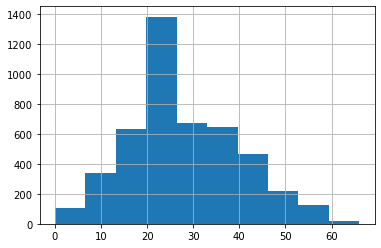

In [382]:
df["Number_Weeks_Used"].hist()
plt.show()

# Number_Weeks_Quit

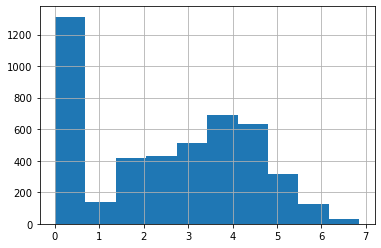

In [383]:
df["Number_Weeks_Quit"].hist()
plt.show()

# Season

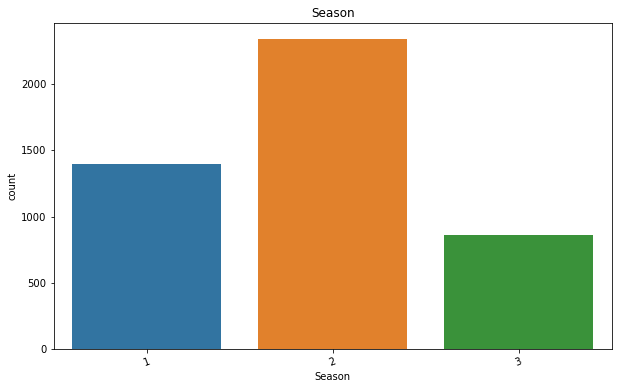

2    2343
1    1397
3     859
Name: Season, dtype: int64


In [385]:
plt.subplots(figsize=(10,6))
sns.countplot(x="Season",data=df)
plt.title("Season")
plt.xticks(rotation=20)
plt.show()

print(df.Season.value_counts())

# Bivariate Analysis

# ID bvs Crop_Damage

In [ ]:
plt.figure(figsize=(8,4))
sns.lmplot(x='u',y='class',fit_reg=False,data=df)
plt.show()

# Estimated_Insects_Count vs Crop_Damage

<Figure size 576x288 with 0 Axes>

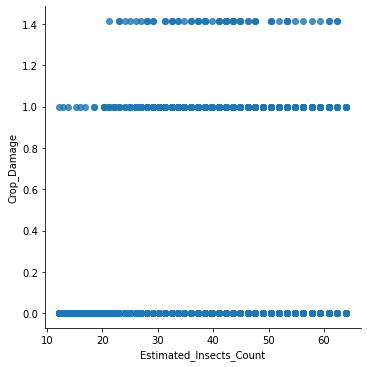

In [389]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Estimated_Insects_Count',y='Crop_Damage',fit_reg=False,data=df)
plt.show()

# Crop_Type vs Crop_Damage

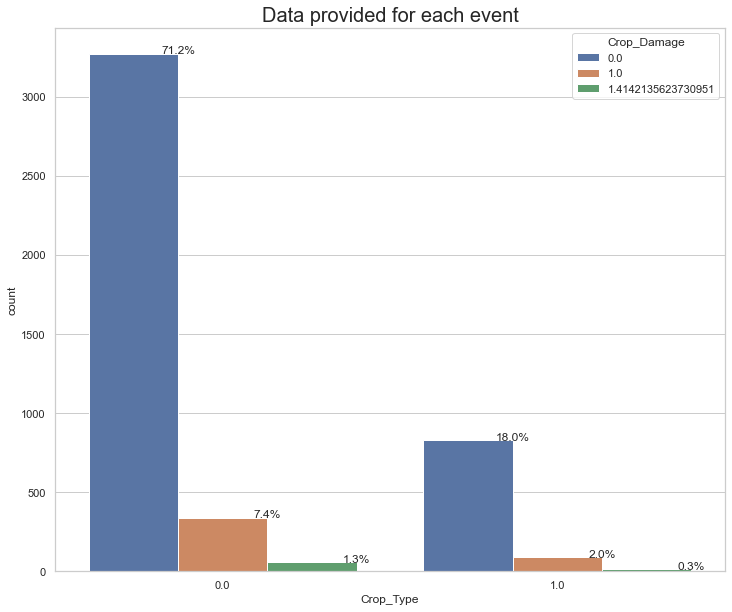

In [393]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
total = float(len(df))
ax = sns.countplot(x="Crop_Type", hue="Crop_Damage", data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Soil_Type vs Crop_Damage

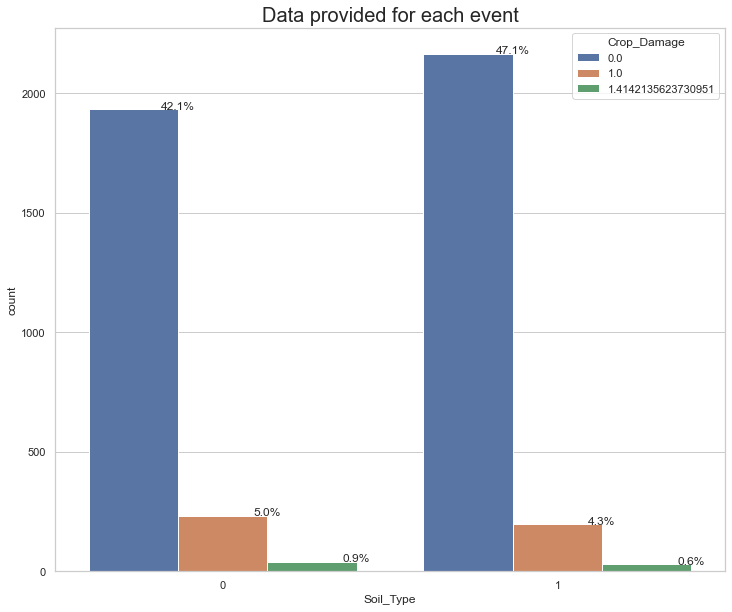

In [394]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
total = float(len(df))
ax = sns.countplot(x="Soil_Type", hue="Crop_Damage", data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Pesticide_Use_Category vs Crop_Damage

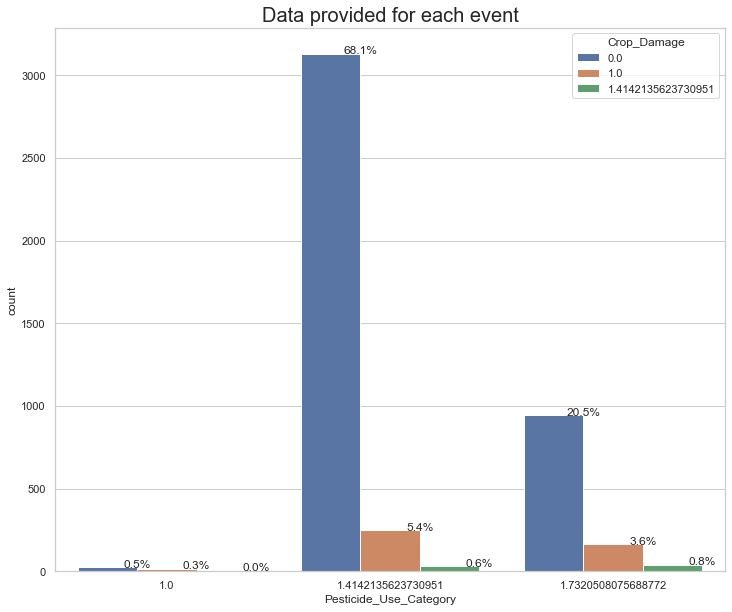

In [395]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
total = float(len(df))
ax = sns.countplot(x="Pesticide_Use_Category", hue="Crop_Damage", data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

# Number_Doses_Week vs Crop_Damage

<Figure size 576x288 with 0 Axes>

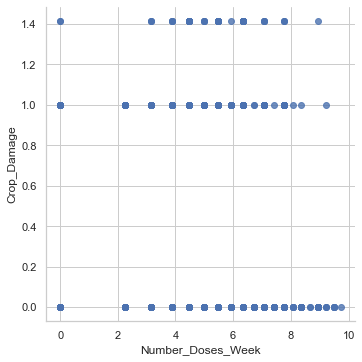

In [398]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Doses_Week',y='Crop_Damage',fit_reg=False,data=df)
plt.show()

# Number_Weeks_Used vs Crop_Damage

<Figure size 576x288 with 0 Axes>

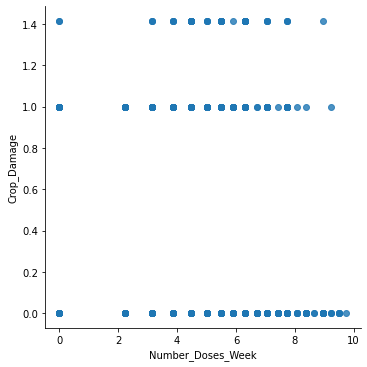

In [390]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Doses_Week',y='Crop_Damage',fit_reg=False,data=df)
plt.show()

# Number_Weeks_Quit vs Crop_Damage

<Figure size 576x288 with 0 Axes>

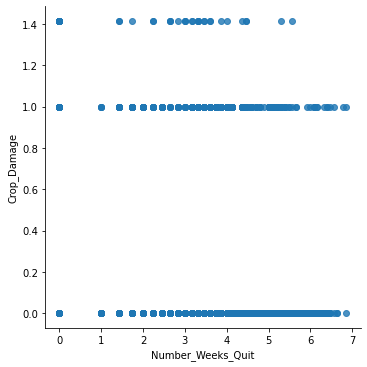

In [391]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Quit',y='Crop_Damage',fit_reg=False,data=df)
plt.show()

# Season vs Crop_Damage

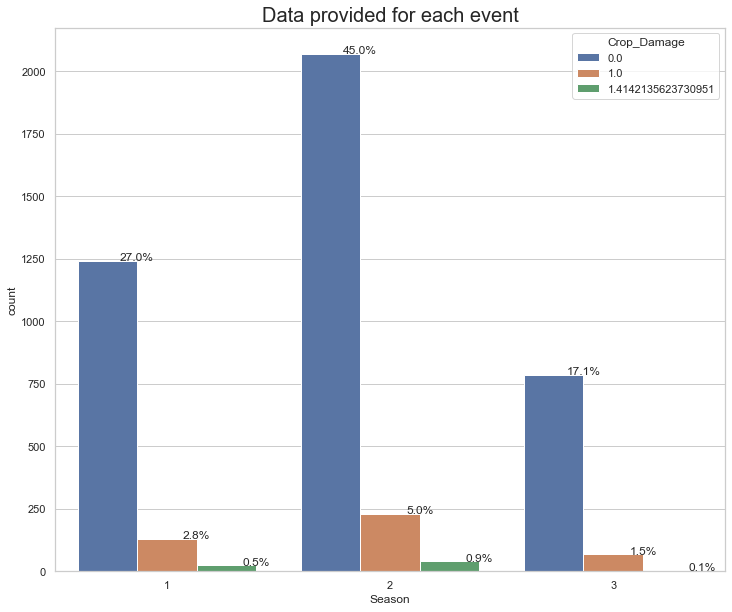

In [396]:
sns.set(style="whitegrid")
plt.figure(figsize=(12,10))
total = float(len(df))
ax = sns.countplot(x="Season", hue="Crop_Damage", data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

In [399]:
df.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

# Number_Weeks_Quit and Estimated_Insects_Count

<Figure size 576x288 with 0 Axes>

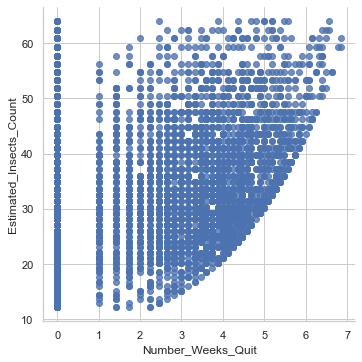

In [400]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Quit',y='Estimated_Insects_Count',fit_reg=False,data=df)
plt.show()

# Number_Weeks_Quit and Pesticide_Use_Category

<Figure size 576x288 with 0 Axes>

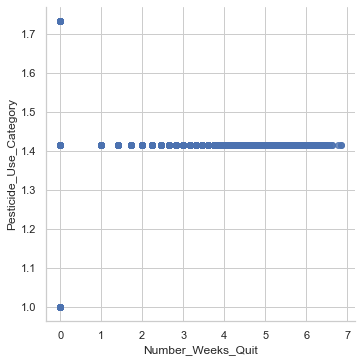

In [401]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Quit',y='Pesticide_Use_Category',fit_reg=False,data=df)
plt.show()

# Number_Weeks_Used and Pesticide_Use_Category

<Figure size 576x288 with 0 Axes>

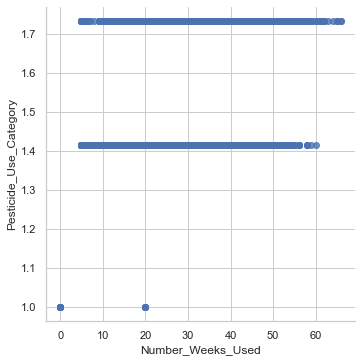

In [402]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Used',y='Pesticide_Use_Category',fit_reg=False,data=df)
plt.show()

# Number_Weeks_Used and Number_Weeks_Quit

<Figure size 576x288 with 0 Axes>

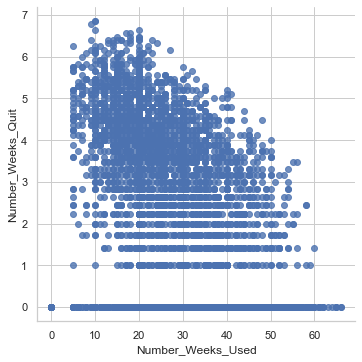

In [403]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Used',y='Number_Weeks_Quit',fit_reg=False,data=df)
plt.show()

# Pesticide_Use_Category and crop_type

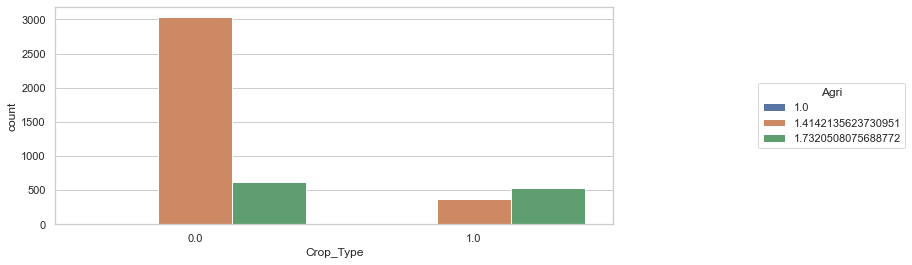

In [410]:
plt.figure(figsize=(10,4))
#plt.legend(loc='upper left')

g = sns.countplot(data = df, x = 'Crop_Type', hue = 'Pesticide_Use_Category')
g.legend(title = 'Agri', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

# Number_Weeks_Used and Estimated_Insects_Count

<Figure size 576x288 with 0 Axes>

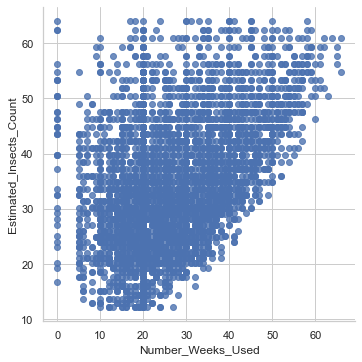

In [411]:
plt.figure(figsize=(8,4))
sns.lmplot(x='Number_Weeks_Used',y='Estimated_Insects_Count',fit_reg=False,data=df)
plt.show()

# Check Outliers

In [330]:
df.columns

Index(['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

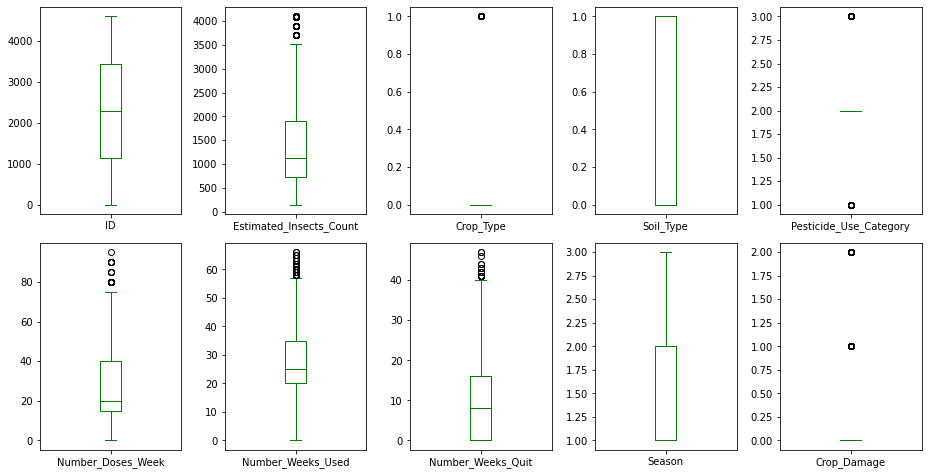

In [331]:
df.plot(kind='box',subplots=True,layout=(4,5),color='green',figsize=(13,13))
plt.tight_layout()

Observations :

Outliers are present in 'Estimated_Insects_Count', 'Crop_Type','Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit','Crop_Damage' columns

# Skewness

### Check the distribution of Skewness

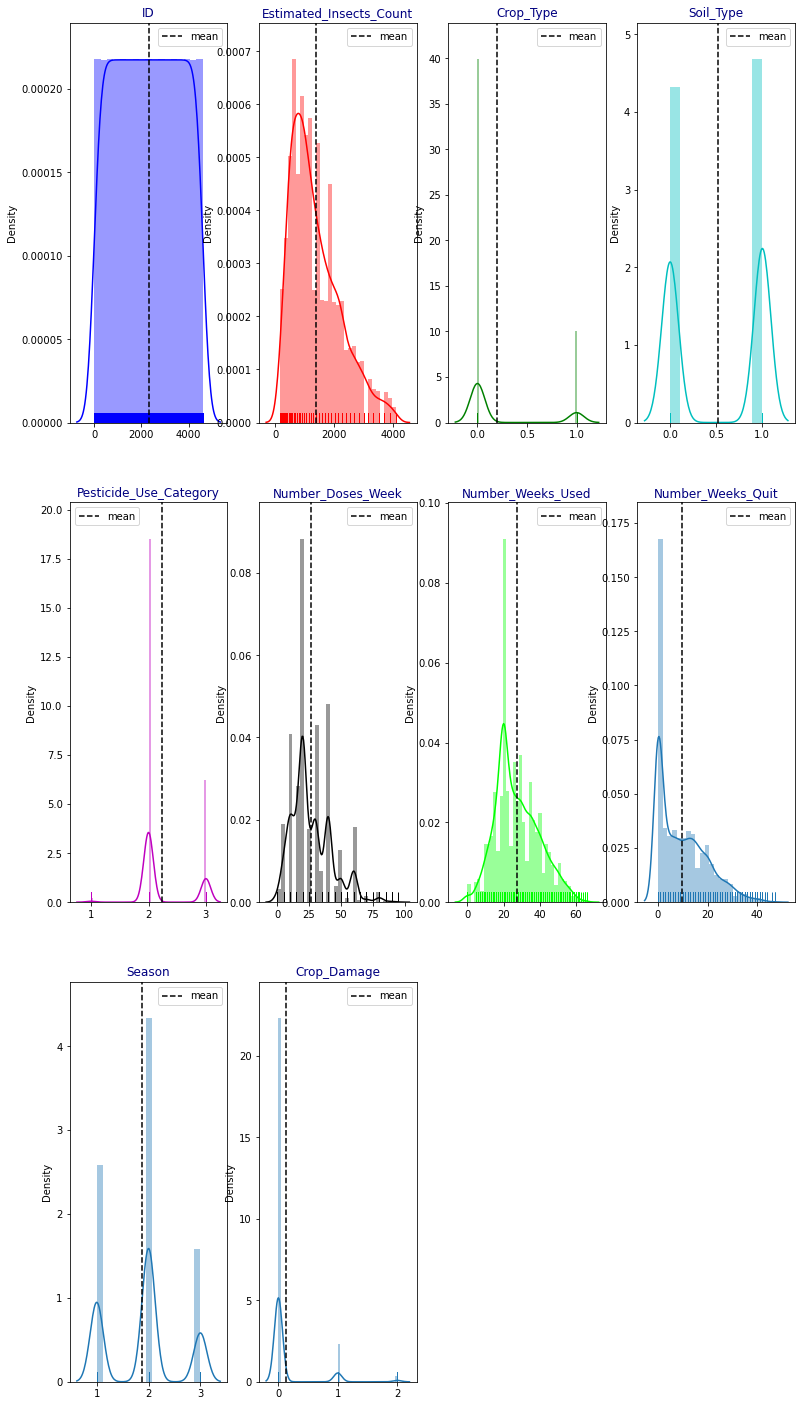

In [332]:
import itertools
cols=['ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type','Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used','Number_Weeks_Quit', 'Season', 'Crop_Damage']
length=len(cols)
cs=["b","r","g","c","m","k","lime"]
fig=plt.figure(figsize=(13,25))

for i,j,k in itertools.zip_longest(cols,range(length),cs):
    plt.subplot(3,4,j+1)
    ax=sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

'Estimated_Insects_Count','Number_Weeks_Used','Number_Doses_Week' columns are right skewed.

In [333]:
df.skew()

ID                         0.000000
Estimated_Insects_Count    0.937422
Crop_Type                  1.484943
Soil_Type                 -0.080544
Pesticide_Use_Category     0.901350
Number_Doses_Week          0.932581
Number_Weeks_Used          0.457184
Number_Weeks_Quit          0.868002
Season                     0.157874
Crop_Damage                3.124424
dtype: float64

### Treating Skewness via root method and cube root method

In [334]:
df.skew()
for col in df.skew().index:
    if col in df.describe().columns:
        if df[col].skew()>0.55:
            df[col]=np.sqrt(df[col])
        if df[col].skew()<-0.55:
            df[col]=np.cbrt(df[col])

In [335]:
df.skew()

ID                         0.000000
Estimated_Insects_Count    0.318096
Crop_Type                  1.484943
Soil_Type                 -0.080544
Pesticide_Use_Category     0.696426
Number_Doses_Week          0.014570
Number_Weeks_Used          0.457184
Number_Weeks_Quit         -0.042350
Season                     0.157874
Crop_Damage                2.633192
dtype: float64

In [336]:
df.isnull().any()

ID                         False
Estimated_Insects_Count    False
Crop_Type                  False
Soil_Type                  False
Pesticide_Use_Category     False
Number_Doses_Week          False
Number_Weeks_Used          False
Number_Weeks_Quit          False
Season                     False
Crop_Damage                False
dtype: bool

After treating skewness there are no missing values here.

In [337]:
df.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,13.711309,1.0,1,1.0,0.0,20.0,0.0,2,0.0
1,1,20.248457,1.0,1,1.0,0.0,0.0,0.0,2,0.0
2,2,25.019992,1.0,0,1.0,0.0,0.0,0.0,2,0.0
3,3,27.037012,1.0,0,1.0,0.0,0.0,0.0,2,0.0
4,4,28.089144,0.0,0,1.0,0.0,0.0,0.0,1,0.0


In [338]:
df.nunique()

ID                         4599
Estimated_Insects_Count      71
Crop_Type                     2
Soil_Type                     2
Pesticide_Use_Category        3
Number_Doses_Week            20
Number_Weeks_Used            63
Number_Weeks_Quit            47
Season                        3
Crop_Damage                   3
dtype: int64

<AxesSubplot:>

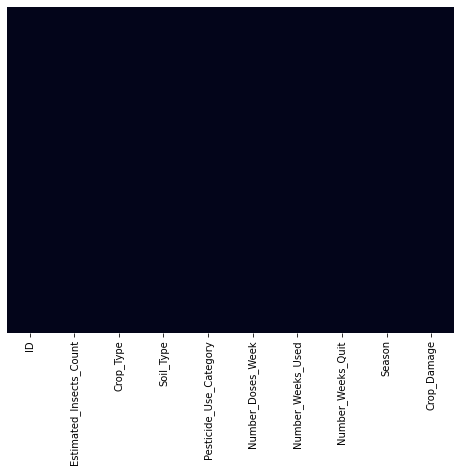

In [339]:
plt.figure(figsize=(8,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

# Removing Outliers

### z-score

In [340]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
df_new=df[(z<3).all(axis=1)]

### Checking shape

In [341]:
print(df.shape,"\t\t",df_new.shape)

(4599, 10) 		 (4481, 10)


### Percentage Loss

In [342]:
data_loose=(118/4599)*100
print(data_loose)

2.5657751685148944


### IQR

In [343]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
IQR=q3-q1
print(IQR)
df_new1=df[~((df<(q1-1.5*IQR))|(df>(q3+1.5*IQR))).any(axis=1)]
print(df_new1.shape)

ID                         2299.000000
Estimated_Insects_Count      16.529030
Crop_Type                     0.000000
Soil_Type                     1.000000
Pesticide_Use_Category        0.000000
Number_Doses_Week             2.451572
Number_Weeks_Used            15.000000
Number_Weeks_Quit             4.000000
Season                        1.000000
Crop_Damage                   0.000000
dtype: float64
(2768, 10)


### Percentage loss

In [344]:
data_loose=(1831/4599)*100
print(data_loose)

39.81300282670146


Huge data loss. So, z score is better.

# Model Training

In [345]:
x=df_new.drop(columns=['Crop_Damage'],axis=1)
x.head()
x=x.astype(int)

In [346]:
y=df_new['Crop_Damage']
y.head()

22    0.0
23    0.0
24    0.0
25    0.0
26    0.0
Name: Crop_Damage, dtype: float64

### Checking the shape of the input and output variable

In [347]:
print(x.shape,'\t\t', y.shape)

(4481, 9) 		 (4481,)


# Scaling 

### StandardScaler

In [348]:
#from sklearn.preprocessing import StandardScaler
#ss=StandardScaler()
#x=ss.fit_transform(x)

In [349]:
x=pd.DataFrame(x)
x.head()

,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
22,22,12,0,0,1,5,20,0,2
23,23,12,0,0,1,6,19,0,1
24,24,12,0,1,1,4,10,0,2
25,25,12,0,1,1,5,14,0,3
26,26,12,0,1,1,5,19,0,1


In [350]:
x.dtypes

ID                         int32
Estimated_Insects_Count    int32
Crop_Type                  int32
Soil_Type                  int32
Pesticide_Use_Category     int32
Number_Doses_Week          int32
Number_Weeks_Used          int32
Number_Weeks_Quit          int32
Season                     int32
dtype: object

### spliting the data into training and testing set

In [351]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=42)

### Checking the shape

In [352]:
print(x_train.shape,'\t\t',x_test.shape)

(3584, 9) 		 (897, 9)


In [353]:
print(y_train.shape,'\t\t',y_test.shape)

(3584,) 		 (897,)


# Importing all the model Library

In [354]:
# Libraries for data modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#Importinf boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV,cross_val_score

# All algorithms are in one Code

In [355]:
y=y.astype(int)
y.head()

22    0
23    0
24    0
25    0
26    0
Name: Crop_Damage, dtype: int32

In [356]:
y.nunique()

2

In [357]:
#LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()
model=[LogisticRegression(),GaussianNB(),SVC(),DecisionTreeClassifier(),KNeighborsClassifier(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),BaggingClassifier(),ExtraTreesClassifier()]

for m in model:
    m.fit(x_train,y_train)
    m.score(x_train,y_train)
    predm=m.predict(x_test)
    print("\033[1m"+ 'Accuracy score of',m,'is : ' + "\033[0m" )  # Make the line bold
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('*******************************************************************')
    print('\n')

Accuracy score of LogisticRegression() is : 
0.9119286510590858
[[818   1]
 [ 78   0]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       819
         1.0       0.00      0.00      0.00        78

    accuracy                           0.91       897
   macro avg       0.46      0.50      0.48       897
weighted avg       0.83      0.91      0.87       897

*******************************************************************


Accuracy score of GaussianNB() is : 
0.9063545150501672
[[806  13]
 [ 71   7]]
              precision    recall  f1-score   support

         0.0       0.92      0.98      0.95       819
         1.0       0.35      0.09      0.14        78

    accuracy                           0.91       897
   macro avg       0.63      0.54      0.55       897
weighted avg       0.87      0.91      0.88       897

*******************************************************************


Accuracy score of SVC() is : 
0.91304347

Observations : 
    
1. Accuracy score of LogisticRegression() is : 0.9119286510590858

2. Accuracy score of GaussianNB() is : 0.9063545150501672

3. Accuracy score of SVC() is : 0.9130434782608695

4. Accuracy score of DecisionTreeClassifier() is : 0.8639910813823858

5. Accuracy score of KNeighborsClassifier() is : 0.9041248606465998

6. Accuracy score of RandomForestClassifier() is : 0.9096989966555183

7. Accuracy score of AdaBoostClassifier() is : 0.9108138238573021

8. Accuracy score of GradientBoostingClassifier() is : 0.9085841694537347

9. Accuracy score of BaggingClassifier() is : 0.9063545150501672

10. Accuracy score of ExtraTreesClassifier() is : 0.903010033444816

By justifying the confusion matrix, f1 score and accuracy SVC() is givving the best result

# Finding the best Parameters

### Using GridSearchCV to find the best parameter in SVC()

In [358]:
parameters={'random_state':range(42,100)}
svc=SVC(probability=True)
clf=GridSearchCV(svc,parameters)
clf.fit(x,y)
print(clf.best_params_)

{'random_state': 42}


# Using Best Parameter

### SVC() with best parameter

In [367]:
#,C=1.0, kernel='rbf', degree=1, gamma='scale', coef0=0.0, shrinking=True, probability=True, tol=0.001, cache_size=200, class_weight=None, verbose=False, max_iter=- 1, decision_function_shape='ovr', break_ties=False
svc=SVC(random_state=42,probability=True,degree=1)
svc.fit(x_train,y_train)
svc.score(x_train,y_train)
predsvc=svc.predict(x_test)
print('Accuracy score of',svc,'is : ')
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

Accuracy score of SVC(degree=1, probability=True, random_state=42) is : 
0.9130434782608695
[[819   0]
 [ 78   0]]
              precision    recall  f1-score   support

         0.0       0.91      1.00      0.95       819
         1.0       0.00      0.00      0.00        78

    accuracy                           0.91       897
   macro avg       0.46      0.50      0.48       897
weighted avg       0.83      0.91      0.87       897



# Cross Validation score

### Cross validate the SVC()

In [368]:
score=cross_val_score(svc,x,y,scoring='accuracy')
print("model:",svc)
print("Score:",score)
print("Mean score:",score.mean())
print("Standard deviation:",score.std())

model: SVC(degree=1, probability=True, random_state=42)
Score: [0.90858417 0.90848214 0.90848214 0.90848214 0.90848214]
Mean score: 0.9085025481764613
Standard deviation: 4.081063863670131e-05


### Among all three models SVC() gives highest score so we adopt SVC as our Final Model

### Plotting Confusion matrix for SVC()

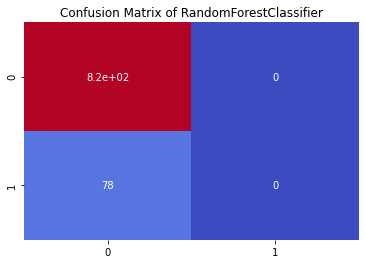

In [369]:
cm=confusion_matrix(y_test,predsvc)
sns.heatmap(cm,annot=True,cbar=False,cmap='coolwarm')

plt.title("Confusion Matrix of RandomForestClassifier")
plt.show()

# Auc_Roc Curve and finding auc score

In [373]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=svc.predict_proba(x_test)
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Support Vector Machine Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Support Vector Machine Classifier')
plt.show()

auc_score=roc_auc_score(y_test,predsvc)
print(auc_score)

ValueError: y should be a 1d array, got an array of shape (897, 2) instead.

# Saving the model

In [374]:
import joblib

# Save the model as a pickle in a file

In [375]:
joblib.dump(svc,'skyserver.pkl')

['skyserver.pkl']